In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [30]:
data_set = pd.read_csv('/content/adult.data',header=None, na_values=' ?', names=[
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race',
    'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
])



In [20]:
data_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
data_set.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [22]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
print(f"Missing values before cleaning: {data_set.isnull().sum()}")
data_set_cleaned = data_set.dropna()
print(f"Missing values after cleaning: {data_set_cleaned.isnull().sum()}")

Missing values before cleaning: age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Missing values after cleaning: age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


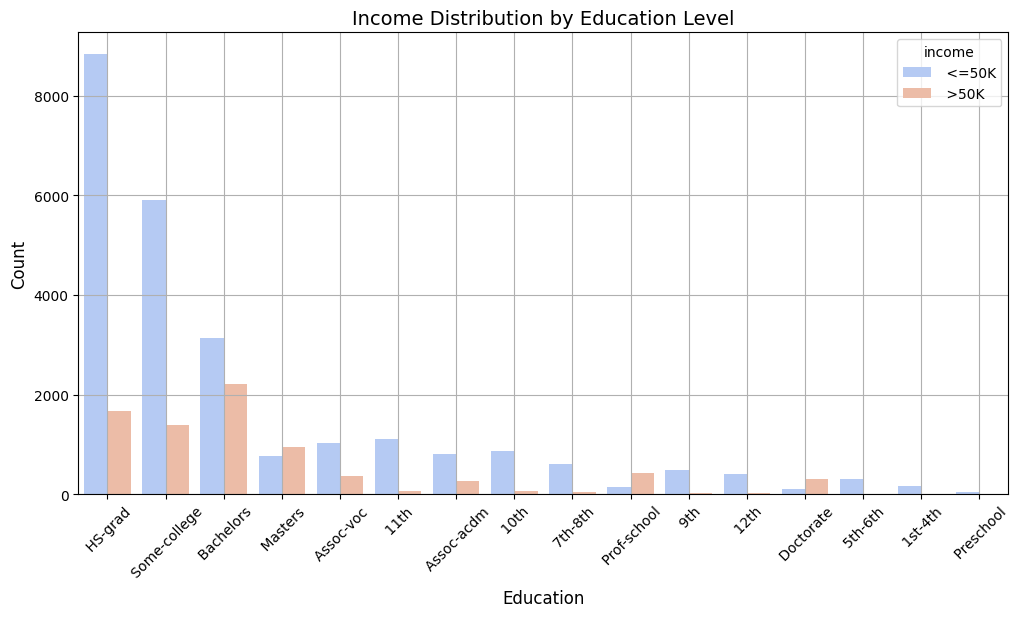

In [7]:




# Income distribution by education (bar plot)
plt.figure(figsize=(12, 6))
sns.countplot(data=data_set, x='education', hue='income', palette='coolwarm', order=data_set['education'].value_counts().index)
plt.title('Income Distribution by Education Level', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()




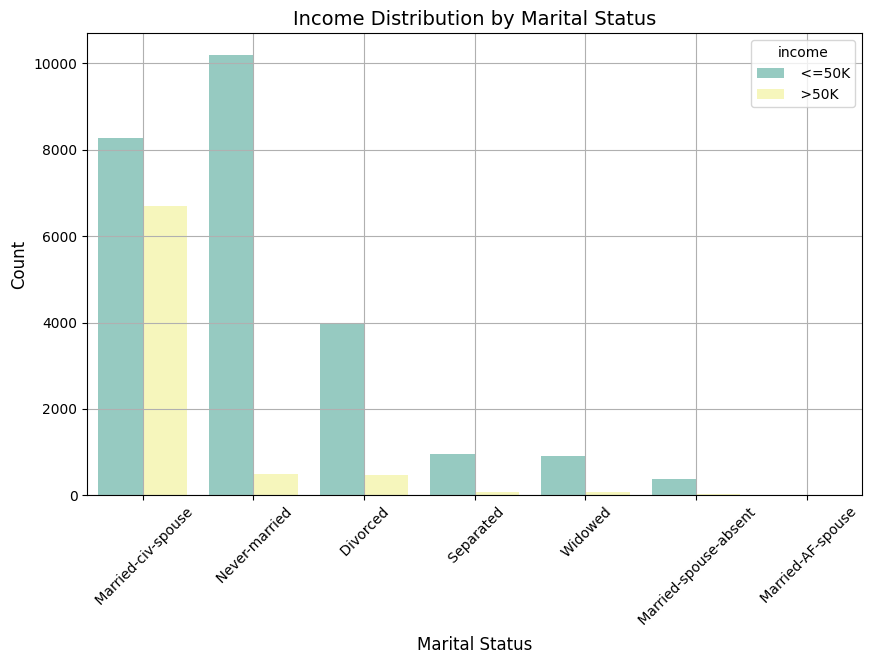

In [8]:
# Marital Status distribution by income (bar plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=data_set, x='marital-status', hue='income', palette='Set3', order=data_set['marital-status'].value_counts().index)
plt.title('Income Distribution by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

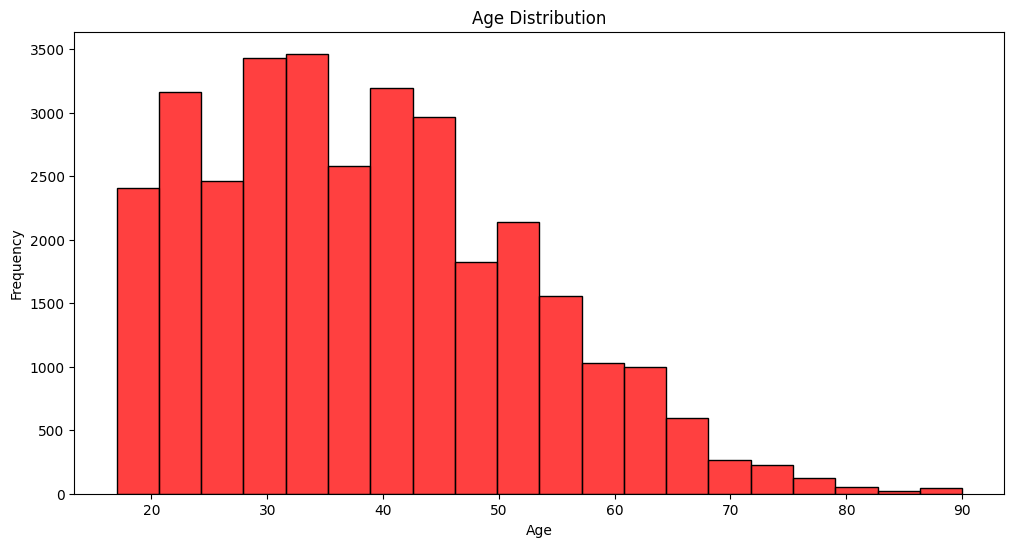

In [9]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data_set['age'], bins=20, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

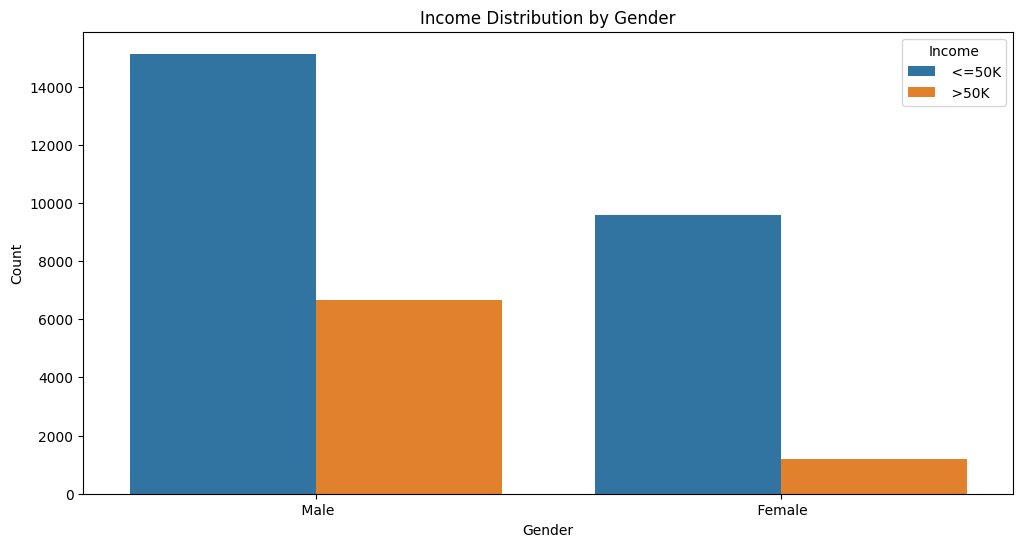

In [10]:
# Income distribution by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=data_set, hue='income')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

In [33]:
data_set['income'].unique()
data_set['income'] = data_set['income'].apply(lambda x: 1 if x == ' >50K' else 0)

In [35]:
data_set['income'].value_counts()

,count
income,
0,24720
1,7841


In [36]:
y = data_set['income']

In [39]:
label_encoders = {}
for column in data_set.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_set[column] = le.fit_transform(data_set[column])
    label_encoders[column] = le  # Store the label encoders for future reference

In [41]:
X = data_set.drop('income', axis=1)

In [59]:
test_data = pd.read_csv('adult.test', skiprows=1, header=None, na_values=' ?', names=[
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race',
    'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
] )

test_data = test_data.dropna()
print(len(test_data))
test_data['income'] = test_data['income'].apply(lambda x: 1 if x == ' >50K.' else 0)

15060


In [60]:
y_test = test_data['income']

In [63]:
for column in test_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:  # Ensure the encoder exists for the column
        le = label_encoders[column]
        test_data[column] = le.transform(test_data[column])

In [69]:
X_test = test_data.drop('income', axis=1)

In [71]:
# Create a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [72]:
y_pred = model.predict(X_test)

In [73]:
len(y_pred)

15060

In [74]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 85.01%

Confusion Matrix:
 [[10522   838]
 [ 1419  2281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.62      0.67      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.79     15060
weighted avg       0.84      0.85      0.85     15060

